<a href="https://colab.research.google.com/github/my2154/letsgrowmoretask4/blob/main/Music%20recomendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import pandas as pd
import os
os.system('apt-get install p7zip')
!pip install pyunpack
!pip install patool
from pyunpack.cli import Archive
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import time
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import lightgbm as lgb
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
import time
# Deep learning libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Input, Model
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from sklearn.metrics import roc_auc_score

     |████████████████████████████████| 77 kB 2.9 MB/s 


In [7]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')
songs = pd.read_csv('./songs.csv')
members = pd.read_csv('./members.csv')
songs_extra = pd.read_csv('./song_extra_info.csv')

In [8]:
members.head()

,msno,city,bd,gender,registered_via,registration_init_time,expiration_date
0,XQxgAYj3klVKjR3oxPPXYYFp4soD4TuBghkhMTD4oTw=,1,0,NaN,7,20110820,20170920
1,UizsfmJb9mV54qE9hCYyU07Va97c0lCRLEQX3ae+ztM=,1,0,NaN,7,20150628,20170622
2,D8nEhsIOBSoE6VthTaqDX8U6lqjJ7dLdr72mOyLya2A=,1,0,NaN,4,20160411,20170712
3,mCuD+tZ1hERA/o5GPqk38e041J8ZsBaLcu7nGoIIvhI=,1,0,NaN,9,20150906,20150907
4,q4HRBfVSssAFS9iRfxWrohxuk9kCYMKjHOEagUMV6rQ=,1,0,NaN,4,20170126,20170613


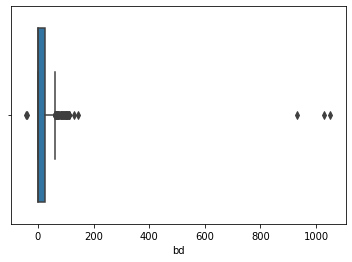

In [9]:
sns.boxplot(x=members['bd'])

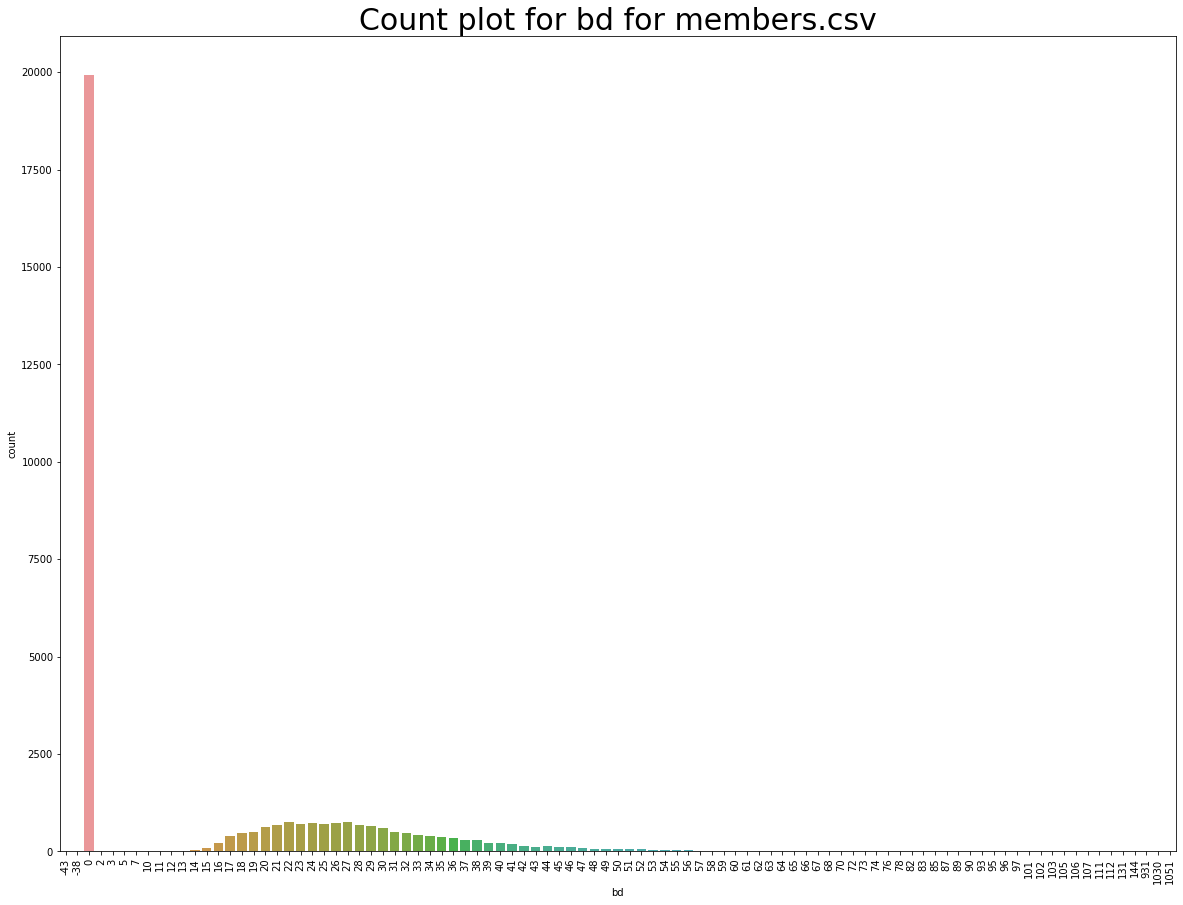

In [10]:
plt.figure(figsize=(20,15)) 
sns.countplot(x ='bd', data = members) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
plt.show() 

In [11]:
members["bd"].describe()

count    34403.000000
mean        12.280935
std         18.170251
min        -43.000000
25%          0.000000
50%          0.000000
75%         25.000000
max       1051.000000
Name: bd, dtype: float64

In [12]:
count=0
for i in members["bd"]:
    if i<=50 and i>=10:
        count+=1
percentage=(count/len(members["bd"]))*100
percentage=("{:.2f}".format(percentage))
print(percentage,"% of user is between 10 and 50")

40.74 % of user is between 10 and 50


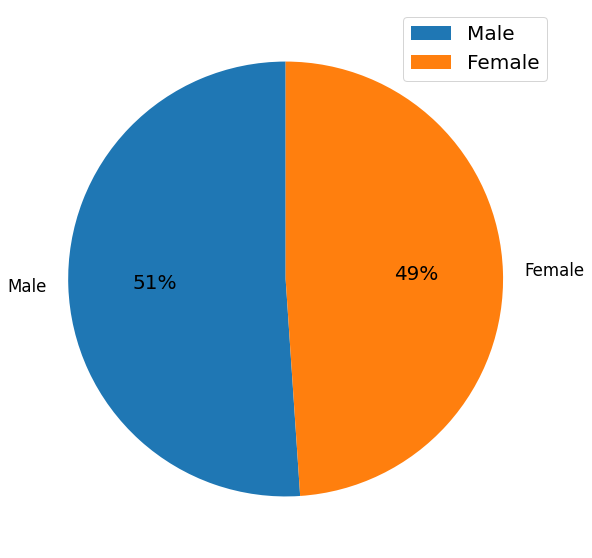

In [13]:
import matplotlib as mpl

mpl.rcParams['font.size'] = 20.0
labels = ['Male','Female']
plt.figure(figsize = (10, 10))
sizes = pd.value_counts(members.gender)
patches, texts, autotexts = plt.pie(sizes, 
                                    labels=labels, autopct='%.0f%%',
                                    shadow=False, radius=1,startangle=90)
for t in texts:
    t.set_size('smaller')
plt.legend()
plt.show()

In [14]:
count = members["gender"].isna().sum()
percentage=(count/len(members['gender']))*100
percentage = "{:.3f}".format(percentage)
print("Total count of gender column of members                   :  ",len(members['gender']))
print("Number of NaN value in gender column of members           :  ",count)
print("Number of non-NaN value in gender coumn of members        :  ",(len(members['gender'])-count))
print("Total percentage of NaN value in gender column of members :  ",percentage+" %")
print("-----------------------------------------------------------------------")

Total count of gender column of members                   :   34403
Number of NaN value in gender column of members           :   19902
Number of non-NaN value in gender coumn of members        :   14501
Total percentage of NaN value in gender column of members :   57.850 %
-----------------------------------------------------------------------


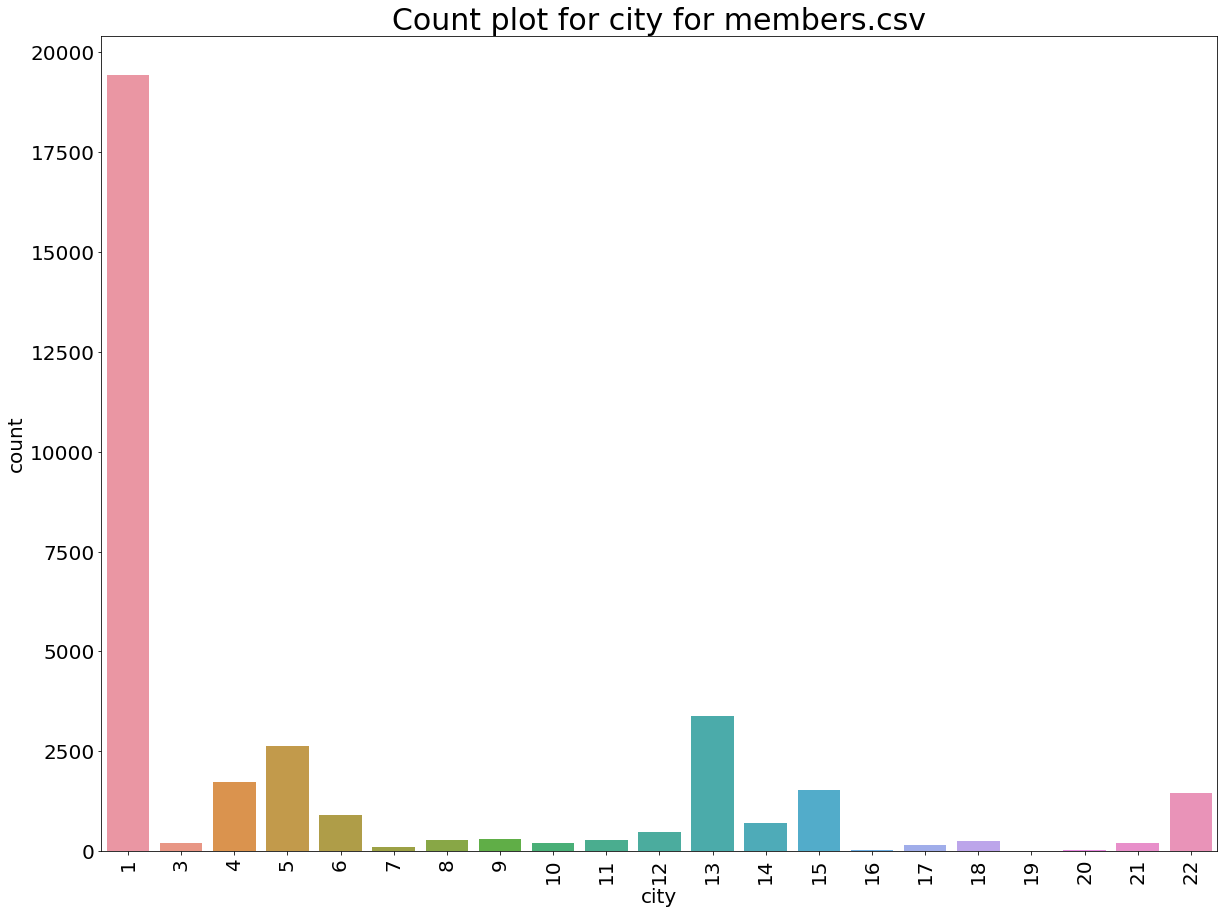

In [15]:
plt.figure(figsize=(20,15))
sns.countplot(x ='city', data = members) 
plt.xticks(rotation='90')
plt.title('Count plot for city for members.csv',fontsize=30)
plt.show() 

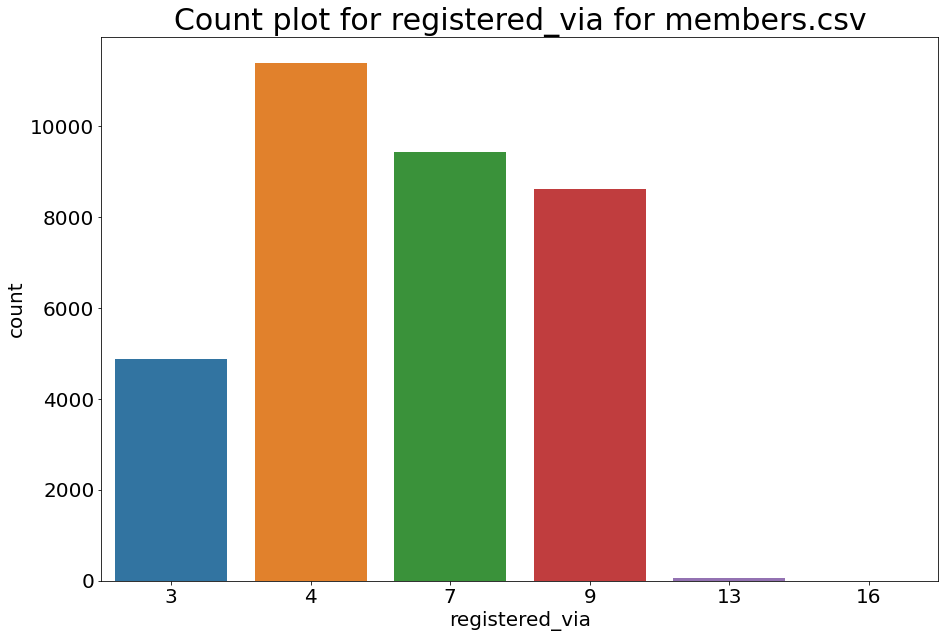

In [16]:
plt.figure(figsize=(15,10))
sns.countplot(x ='registered_via', data = members) 
plt.title('Count plot for registered_via for members.csv',fontsize=30)
plt.show() 

In [17]:
members["registration_init_time"].head()

0    20110820
1    20150628
2    20160411
3    20150906
4    20170126
Name: registration_init_time, dtype: int64

In [18]:
members["expiration_date"].head()

0    20170920
1    20170622
2    20170712
3    20150907
4    20170613
Name: expiration_date, dtype: int64

In [19]:
import pandas as pd
import numpy as np 
import datetime
members["expiration_date"]= pd.to_datetime(members["expiration_date"],format='%Y%m%d') 
members["registration_init_time"]= pd.to_datetime(members["registration_init_time"],format='%Y%m%d') 
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [20]:
members["registration_init_time"].head()
members["expiration_date"].head()

0   2017-09-20
1   2017-06-22
2   2017-07-12
3   2015-09-07
4   2017-06-13
Name: expiration_date, dtype: datetime64[ns]

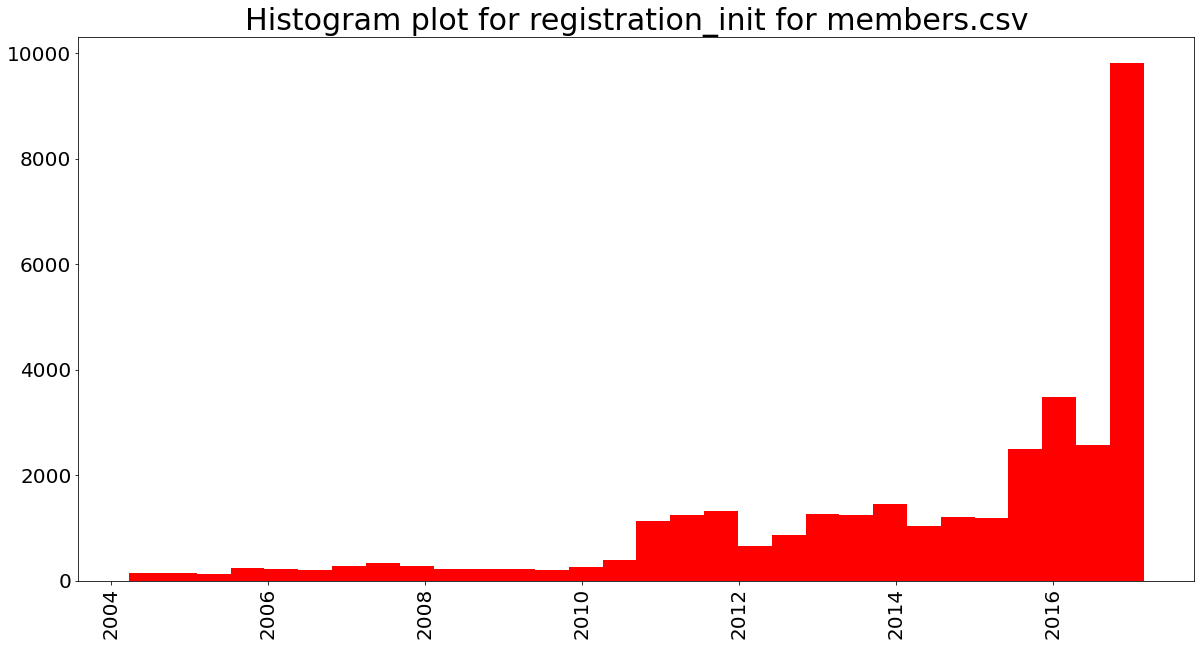

In [21]:
plt.figure(figsize=(20,10))
plt.hist(members["registration_init_time"],bins=30,color='red')
plt.xticks(rotation='90')
plt.title('Histogram plot for registration_init for members.csv',fontsize=30)
plt.show()


In [22]:
songs_extra.head()

,song_id,name,isrc
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001


In [23]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0


In [24]:
from tqdm import tqdm
lst=[]
for i in tqdm(songs["song_length"]):
    minutes = ((i/(1000*60))%60)
    minutes = round(minutes)
    lst.append(minutes)

100%|██████████| 63382/63382 [00:00<00:00, 1035978.10it/s]


In [25]:
songs["song_duration_minutes"]=lst

In [26]:
songs.head()

,song_id,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,CXoTN1eb7AI+DntdU1vbcwGRV4SCIDxZu+YD8JP8r4E=,247640,465,張信哲 (Jeff Chang),董貞,何啟弘,3.0,4
1,o0kFgae9QtnYgRkVPqLJwa05zIhRlUjfF7O1tDw0ZDU=,197328,444,BLACKPINK,TEDDY| FUTURE BOUNCE| Bekuh BOOM,TEDDY,31.0,3
2,DwVvVurfpuz+XPuFvucclVQEyPqcpUkHR0ne1RQzPs0=,231781,465,SUPER JUNIOR,NaN,NaN,31.0,4
3,dKMBWoZyScdxSkihKG+Vf47nc18N9q4m58+b4e7dSSE=,273554,465,S.H.E,湯小康,徐世珍,3.0,5
4,W3bqWd3T+VeHFzHAUfARgW9AvVRaF4N5Yzm4Mr6Eo/o=,140329,726,貴族精選,Traditional,Traditional,52.0,2


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'PDF for song_duration_minutes')

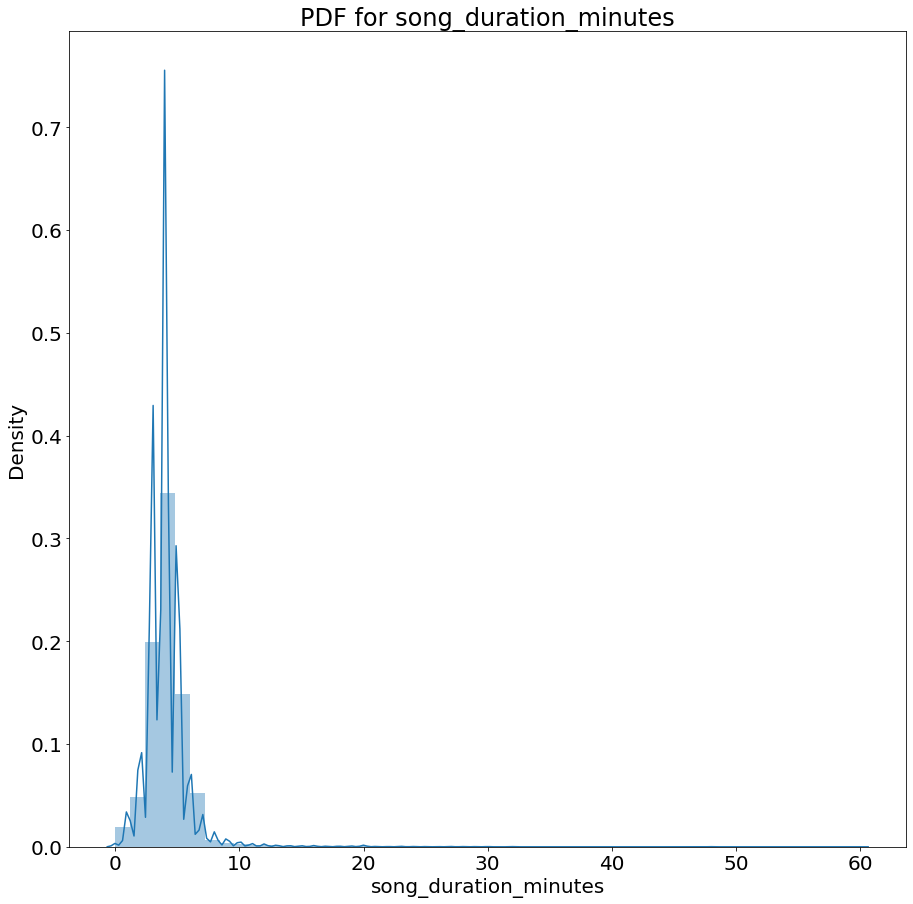

In [27]:
plt.figure(figsize = (15, 15)) 
sns.distplot(songs.song_duration_minutes)
sns.set(font_scale=2)
plt.title('PDF for song_duration_minutes')

In [28]:
count1=0
for i in songs["song_duration_minutes"]:
    if i<=10 and i>0:
        count1+=1
percentage1=(count1/len(songs["song_duration_minutes"]))*100
percentage1=round(percentage1)
print(percentage1,"% of song length is between 1 and 10")

99 % of song length is between 1 and 10


In [29]:
"""plt.figure(figsize = (15, 15)) 
sns.distplot(songs.genre_ids)
sns.set(font_scale=2)
plt.title('PDF for genre id')"""
count=0
for i in songs["genre_ids"]:
    if i=='864|857|850|843':
        count+=1
print("Total count for '864|857|850|843' in genre_ids column : ",count)

Total count for '864|857|850|843' in genre_ids column :  204


In [30]:
lst1=[]
for i in songs["genre_ids"]:
  if i != '864|857|850|843':
    lst1.append(i)
print(lst1[:10])

['465', '444', '465', '465', '726', '458', '465', '465', '352|1995', '2157']


In [31]:
songs["genre_ids"]=songs["genre_ids"].astype(str)
import re
word = 'asdf*'
special_char=0
regexp = re.compile('[^0-9a-zA-Z]+')
for i in songs["genre_ids"]:
  if regexp.search(i):
    special_char+=1

print("Total count of values containing special character '|' in genre_ids column         : ",special_char)
print("Total percentage for values containing special character '|'  in genre_ids column  : ",(special_char/len(songs["genre_ids"]))*100,"%")

Total count of values containing special character '|' in genre_ids column         :  4152
Total percentage for values containing special character '|'  in genre_ids column  :  6.550755735066738 %


In [32]:
count1 = songs["genre_ids"].isnull().sum()
print("Total count of gender column of members                   :  ",len(songs["genre_ids"]))
print("Number of NaN value in gender column of members           :  ",count1)
print("Number of non-NaN value in gender coumn of members        :  ",(len(songs["genre_ids"])-count1))
print("-----------------------------------------------------------------------")

Total count of gender column of members                   :   63382
Number of NaN value in gender column of members           :   0
Number of non-NaN value in gender coumn of members        :   63382
-----------------------------------------------------------------------


In [33]:
song_info = songs_extra.merge(songs, on='song_id', how='left')

In [34]:
song_info.head()

,song_id,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,LP7pLJoJFBvyuUwvu+oLzjT+bI+UeBPURCecJsX1jjs=,我們,TWUM71200043,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ClazTFnk6r0Bnuie44bocdNMM3rdlrq0bCGAsGUWcHE=,Let Me Love You,QMZSY1600015,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,u2ja/bZE3zhCGxvbbOB3zOoUjx27u40cf5g09UXMoKQ=,原諒我,TWA530887303,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,92Fqsy0+p6+RHe2EoLKjHahORHR1Kq1TBJoClW9v+Ts=,Classic,USSM11301446,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0QFmz/+rJy1Q56C1DuYqT9hKKqi5TUqx0sN0IwvoHrw=,愛投羅網,TWA471306001,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
from collections import Counter 
import pandas as pd  
d = Counter(song_info["genre_ids"]) 
df = pd.DataFrame.from_records(d.most_common(), columns=['genre_id','count'])
print(df.head(50))

           genre_id  count
0               NaN  69792
1               465   5144
2              1609    680
3              2022    596
4               921    525
5               458    420
6               958    396
7              1259    394
8              2122    388
9               786    326
10              359    294
11              444    283
12              437    232
13              726    186
14              nan    177
15              139    151
16              451    141
17              947    130
18             1152    110
19              873     89
20              940     80
21      139|125|109     72
22             1011     66
23          786|947     61
24              798     43
25          921|465     41
26              880     37
27          465|430     36
28  864|857|850|843     36
29         1572|275     35
30             1955     34
31              388     32
32              829     32
33              430     31
34              481     31
35             2157     31
3

In [36]:
df.describe()

,count
count,229.000000
mean,357.676856
std,4621.808852
min,1.000000
25%,1.000000
50%,2.000000
75%,10.000000
max,69792.000000


In [37]:
print("Total percentage for NaN value in song_id column        : ",(song_info["song_id"].isna().sum()/len(song_info["song_id"]))*100,"%")
print("Total percentage for NaN value in name column           : ",(song_info["name"].isna().sum()/len(song_info["name"]))*100,"%")
print("Total percentage for NaN value in isrc column           : ",(song_info["isrc"].isna().sum()/len(song_info["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column    : ",(song_info["song_length"].isna().sum()/len(song_info["song_length"]))*100,"%")
print("Total percentage for NaN value in genre_ids column      : ",(song_info["genre_ids"].isna().sum()/len(song_info["genre_ids"]))*100,"%")


print("Total percentage for NaN value in artist_name column    : ",(song_info["artist_name"].isna().sum()/len(song_info["artist_name"]))*100,"%")
print("Total percentage for NaN value in composer column       : ",(song_info["composer"].isna().sum()/len(song_info["composer"]))*100,"%")
print("Total percentage for NaN value in lyricist column       : ",(song_info["lyricist"].isna().sum()/len(song_info["lyricist"]))*100,"%")
print("Total percentage for NaN value in language column       : ",(song_info["language"].isna().sum()/len(song_info["language"]))*100,"%")

Total percentage for NaN value in song_id column        :  0.0 %
Total percentage for NaN value in name column           :  0.0012208819651316112 %
Total percentage for NaN value in isrc column           :  12.977975289349025 %
Total percentage for NaN value in song_length column    :  85.2077941104654 %
Total percentage for NaN value in genre_ids column      :  85.2077941104654 %
Total percentage for NaN value in artist_name column    :  85.2077941104654 %
Total percentage for NaN value in composer column       :  91.28656541485569 %
Total percentage for NaN value in lyricist column       :  95.56697758460712 %
Total percentage for NaN value in language column       :  85.2077941104654 %


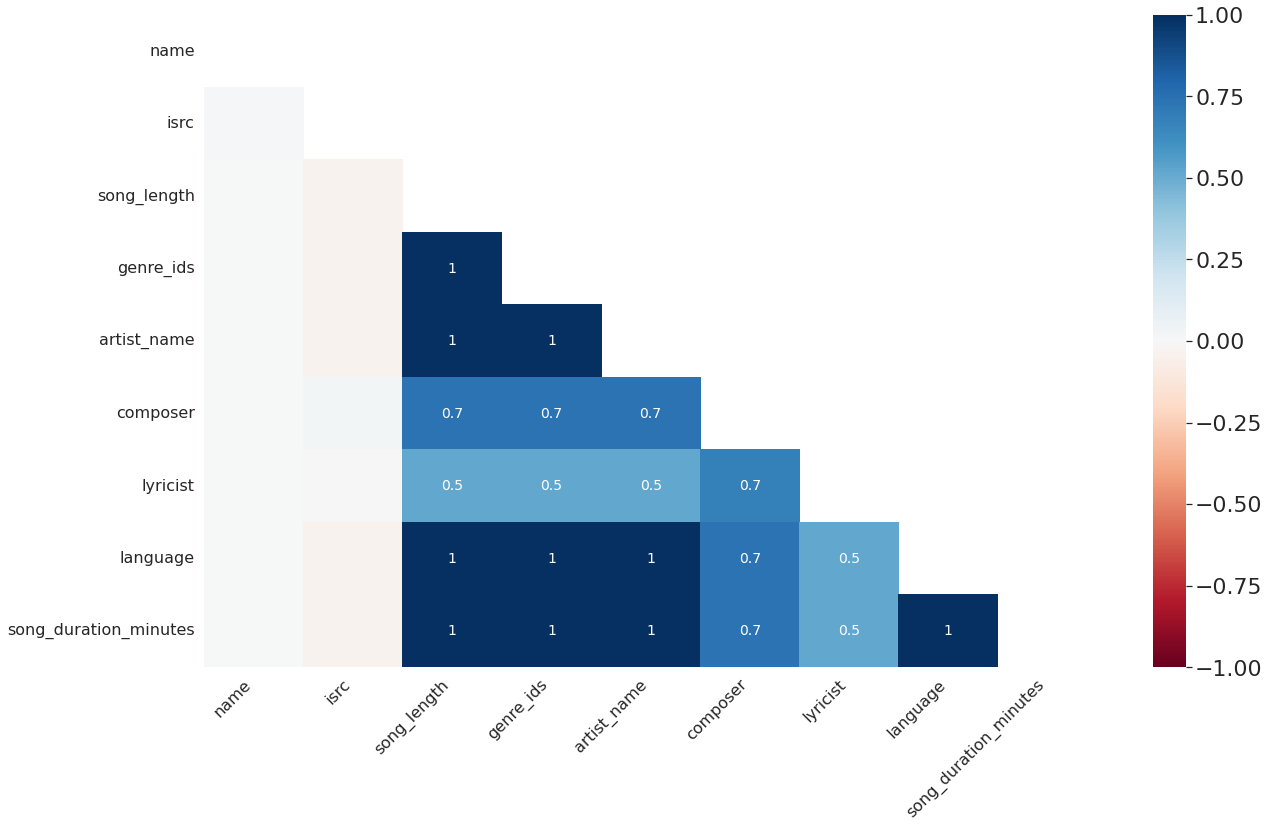

In [38]:
msn.heatmap(song_info)

Text(0.5, 1.0, 'Count plot for system tab there are using')

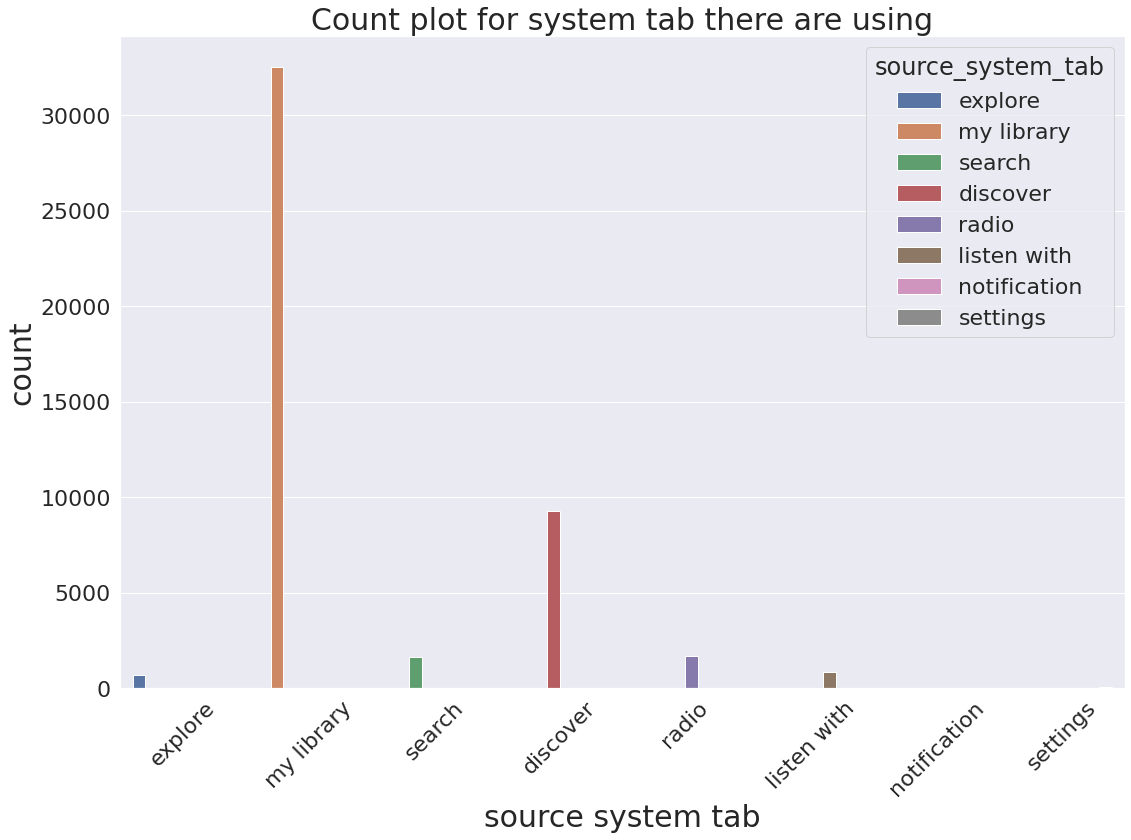

In [39]:
plt.figure(figsize=(18,12))
sns.set(font_scale=2)
sns.countplot(x='source_system_tab',hue='source_system_tab',data=train)
plt.xlabel('source system tab',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system tab there are using',fontsize=30)

In [40]:
print("Total percentage for NaN value in source_system_tab column  : ",(train["source_system_tab"].isna().sum()/len(train["source_system_tab"]))*100,"%")

Total percentage for NaN value in source_system_tab column  :  0.24344929207508487 %


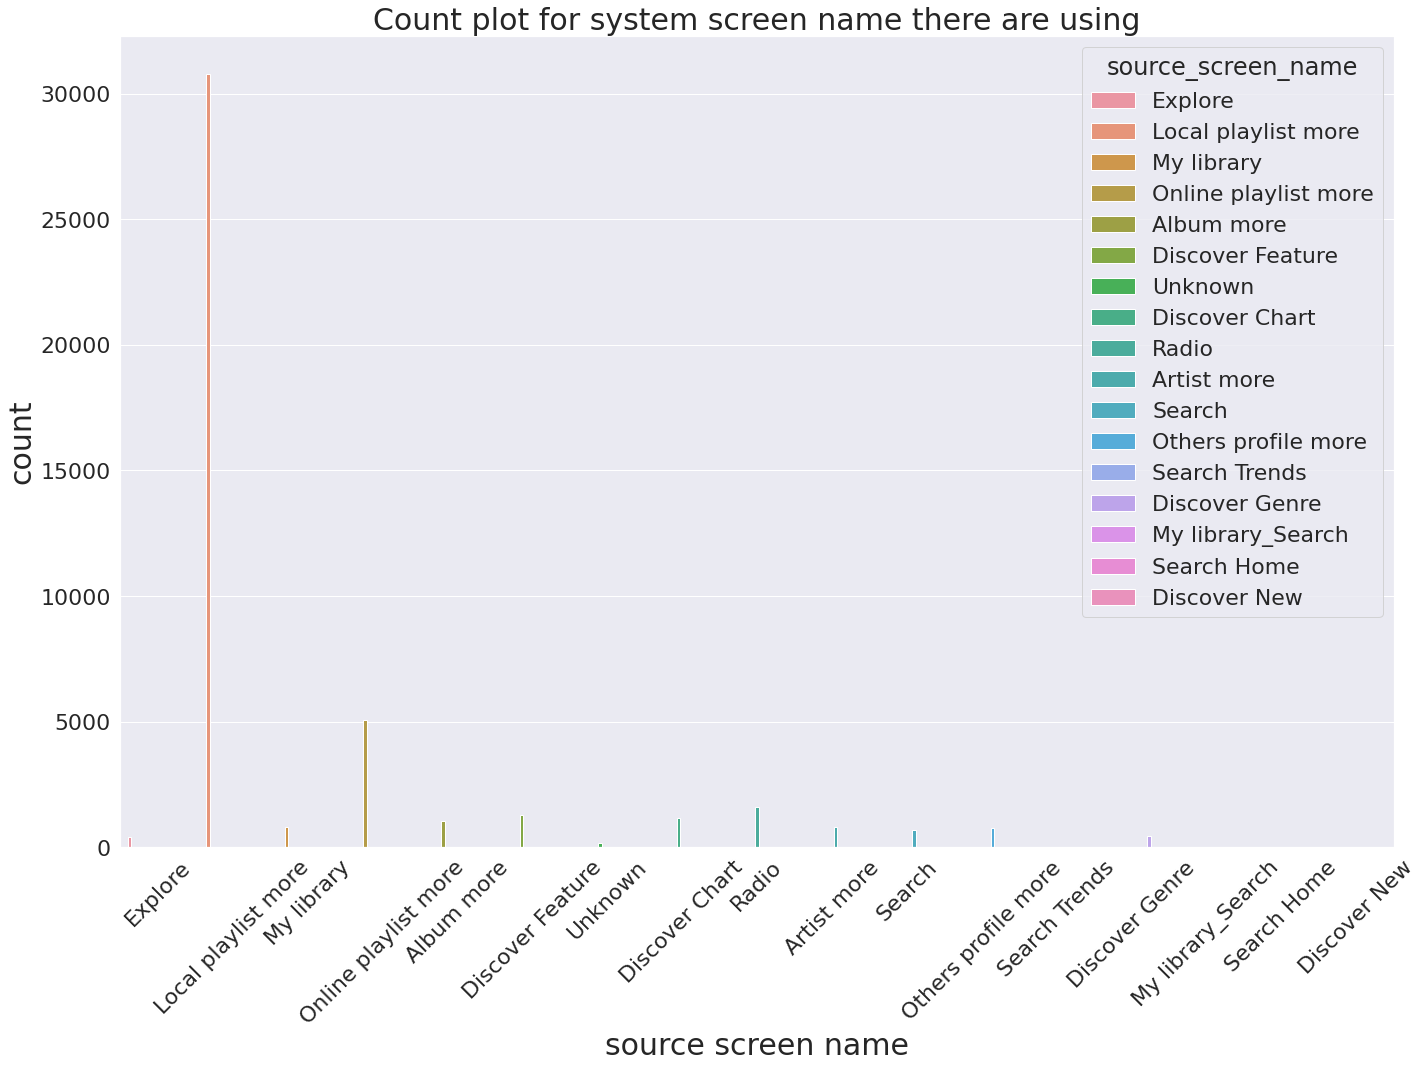

In [41]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_screen_name',hue='source_screen_name',data=train)
sns.set(style="darkgrid")
plt.xlabel('source screen name',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for system screen name there are using',fontsize=30)
plt.tight_layout()

In [42]:
print("Total percentage for NaN value in source_screen_name column  : ",(train["source_screen_name"].isna().sum()/len(train["source_screen_name"]))*100,"%")

Total percentage for NaN value in source_screen_name column  :  3.525743694876887 %


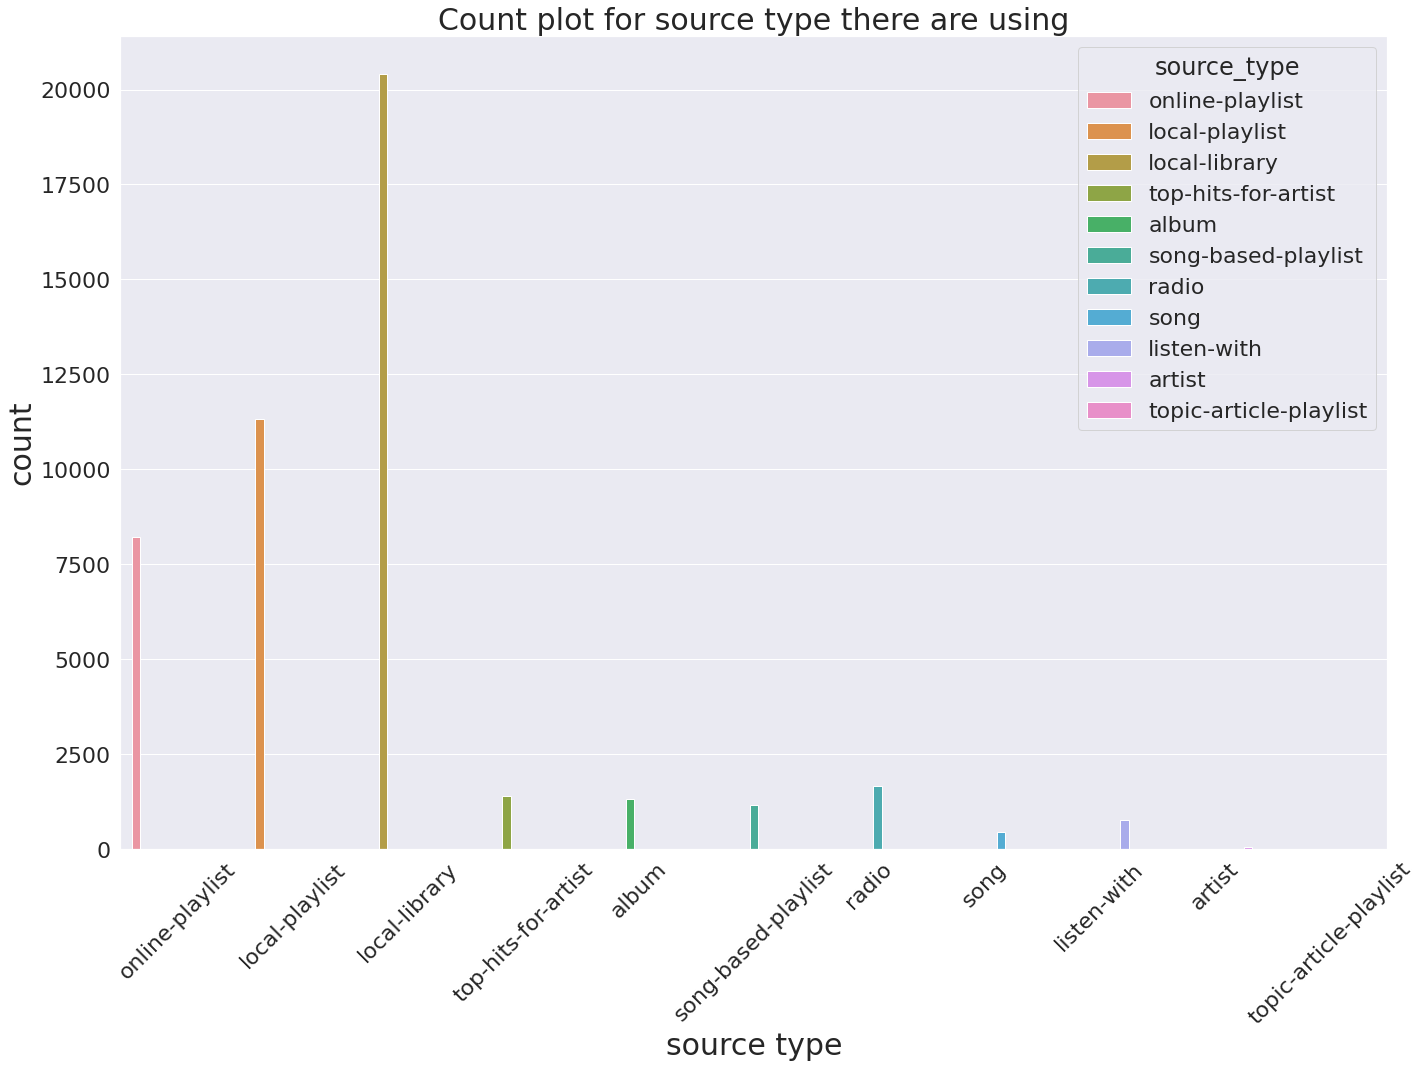

In [43]:
plt.figure(figsize=(20,15))
sns.set(font_scale=2)
sns.countplot(x='source_type',hue='source_type',data=train)
sns.set(style="darkgrid")
plt.xlabel('source type',fontsize=30)
plt.ylabel('count',fontsize=30)
plt.xticks(rotation='45')
plt.title('Count plot for source type there are using',fontsize=30)
plt.tight_layout()

In [44]:
print("Total percentage for NaN value in source_type column  : ",(train["source_type"].isna().sum()/len(train["source_type"]))*100,"%")

Total percentage for NaN value in source_type column  :  0.1516219275204476 %


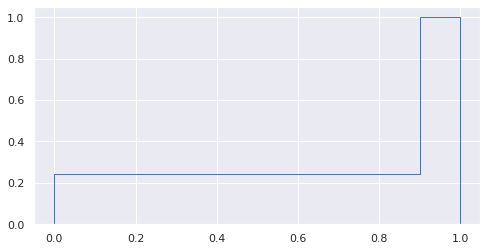

In [45]:
fig, ax = plt.subplots(figsize=(8, 4))

# plot the cumulative histogram
n, bins, patches = ax.hist(train["target"], 10, density=True, histtype='step',
                           cumulative=True, label='Empirical')

In [46]:
print("Total percentage for NaN value in target column  : ",(train["target"].isna().sum()/len(train["target"]))*100,"%")

Total percentage for NaN value in target column  :  0.002135520105921797 %


In [47]:
duplicate_values = len(train["msno"])-train["msno"].nunique()
print("Total no of duplicate user id         : ",duplicate_values)
print("Total percentage of duplicate user id : ",(duplicate_values/len(train["msno"]))*100,"%")

Total no of duplicate user id         :  42735
Total percentage of duplicate user id :  91.26145172656801 %


In [48]:
duplicate_values1 = len(train["song_id"])-train["song_id"].nunique()
print("Total no of duplicate song id         : ",duplicate_values1)
print("Total percentage of duplicate song id : ",(duplicate_values1/len(train["song_id"]))*100,"%")

Total no of duplicate song id         :  29194
Total percentage of duplicate song id :  62.344373972280955 %


In [49]:
train_and_members = pd.merge(train, members, on='msno', how='left')
final_train       = pd.merge(train_and_members, song_info, on='song_id', how='left')

In [50]:
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,expiration_date,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1.0,0.0,NaN,7.0,...,2017-10-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,2017-09-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,1.0,0.0,NaN,7.0,...,2017-10-05,Sleep Without You,QM3E21606003,NaN,NaN,NaN,NaN,NaN,NaN,NaN


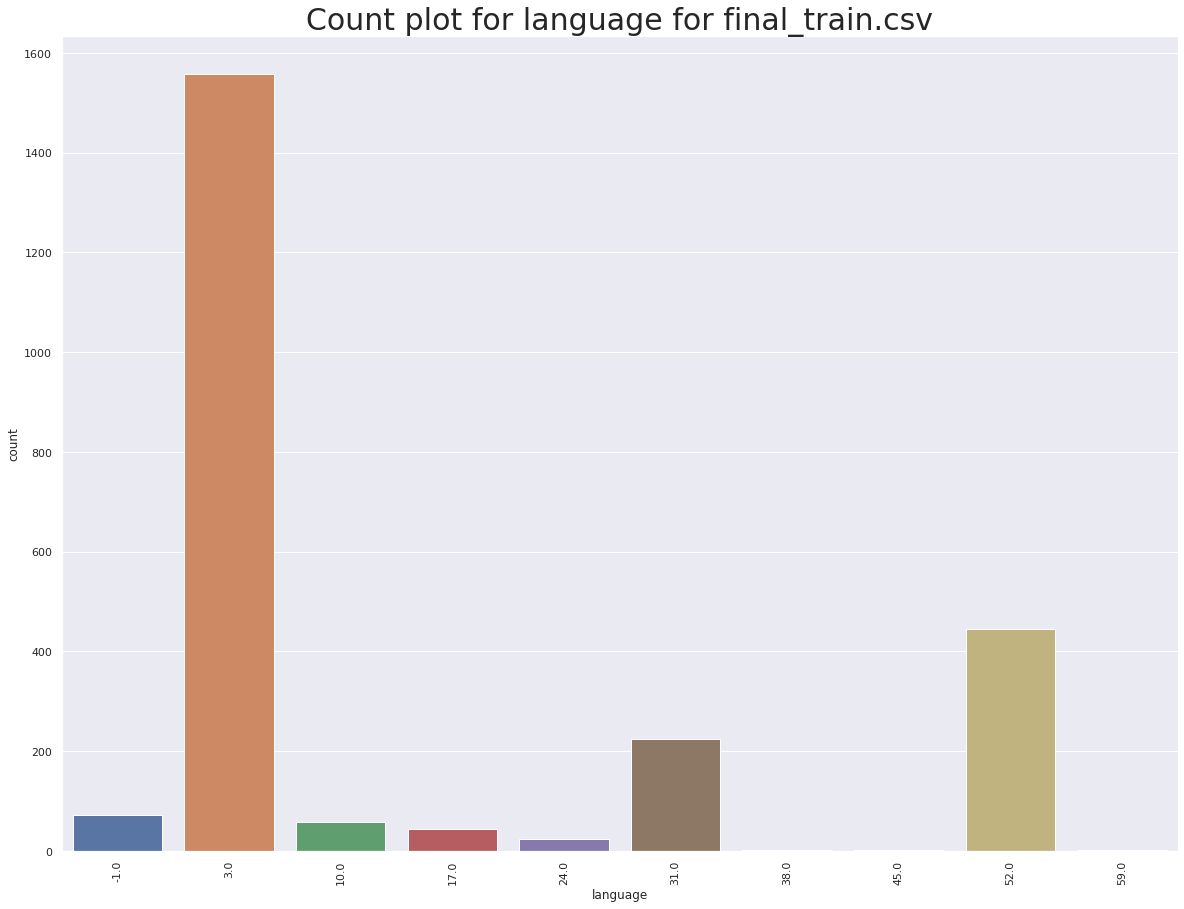

In [51]:
plt.figure(figsize=(20,15)) 
sns.countplot(x ='language', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for language for final_train.csv',fontsize=30)
plt.show()

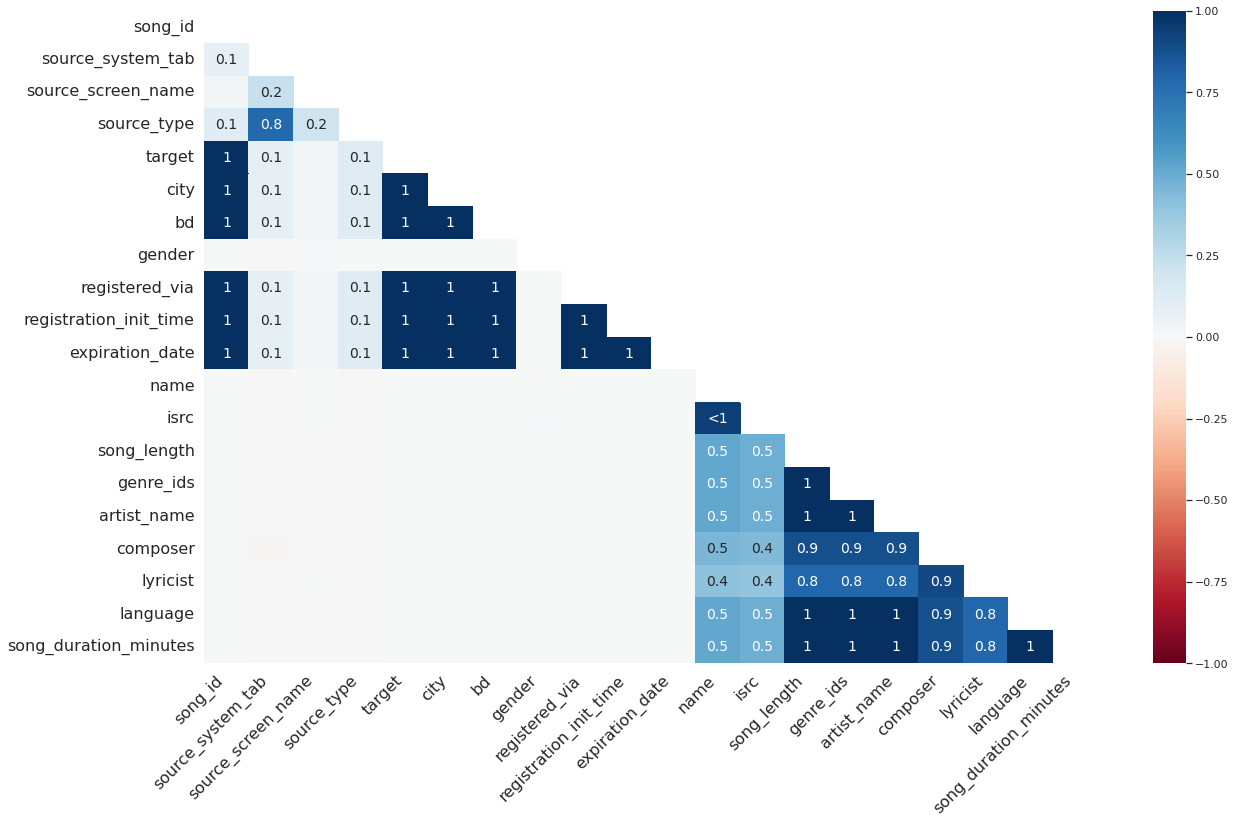

In [52]:
msn.heatmap(final_train)

In [53]:
test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio


In [54]:
print("Total percentage for NaN value in source_system_tab column   : ",(test["source_system_tab"].isna().sum()/len(test["source_system_tab"]))*100,"%")
print("Total percentage for NaN value in source_screen_name column  : ",(test["source_screen_name"].isna().sum()/len(test["source_screen_name"]))*100,"%")
print("Total percentage for NaN value in source_type column         : ",(test["source_type"].isna().sum()/len(test["source_type"]))*100,"%")
print("Total percentage for NaN value in song_id column             : ",(test["song_id"].isna().sum()/len(test["song_id"]))*100,"%")
print("Total percentage for NaN value in msno column                : ",(test["msno"].isna().sum()/len(test["msno"]))*100,"%")

Total percentage for NaN value in source_system_tab column   :  0.276004195263768 %
Total percentage for NaN value in source_screen_name column  :  5.61024527572819 %
Total percentage for NaN value in source_type column         :  0.4213664047693525 %
Total percentage for NaN value in song_id column             :  0.0 %
Total percentage for NaN value in msno column                :  0.0 %


In [55]:
from numpy import nan
final_train["gender"].fillna("gender_not_available", inplace=True)

In [56]:
print(final_train["gender"].isnull().sum())

0


In [57]:
final_train["bd"].fillna(members["bd"].mean(), inplace=True)
print(members["bd"].isnull().sum())

0


In [58]:
bd_c=0
for i in final_train["bd"]:
    if i<0 and i>80:
        bd_c+=1
print(bd_c)

0


In [59]:
from numpy import nan
final_train["bd"]=final_train["bd"].mask(final_train["bd"]==0).fillna(final_train["bd"].mean())

In [60]:
final_train["bd"]=final_train["bd"].round()

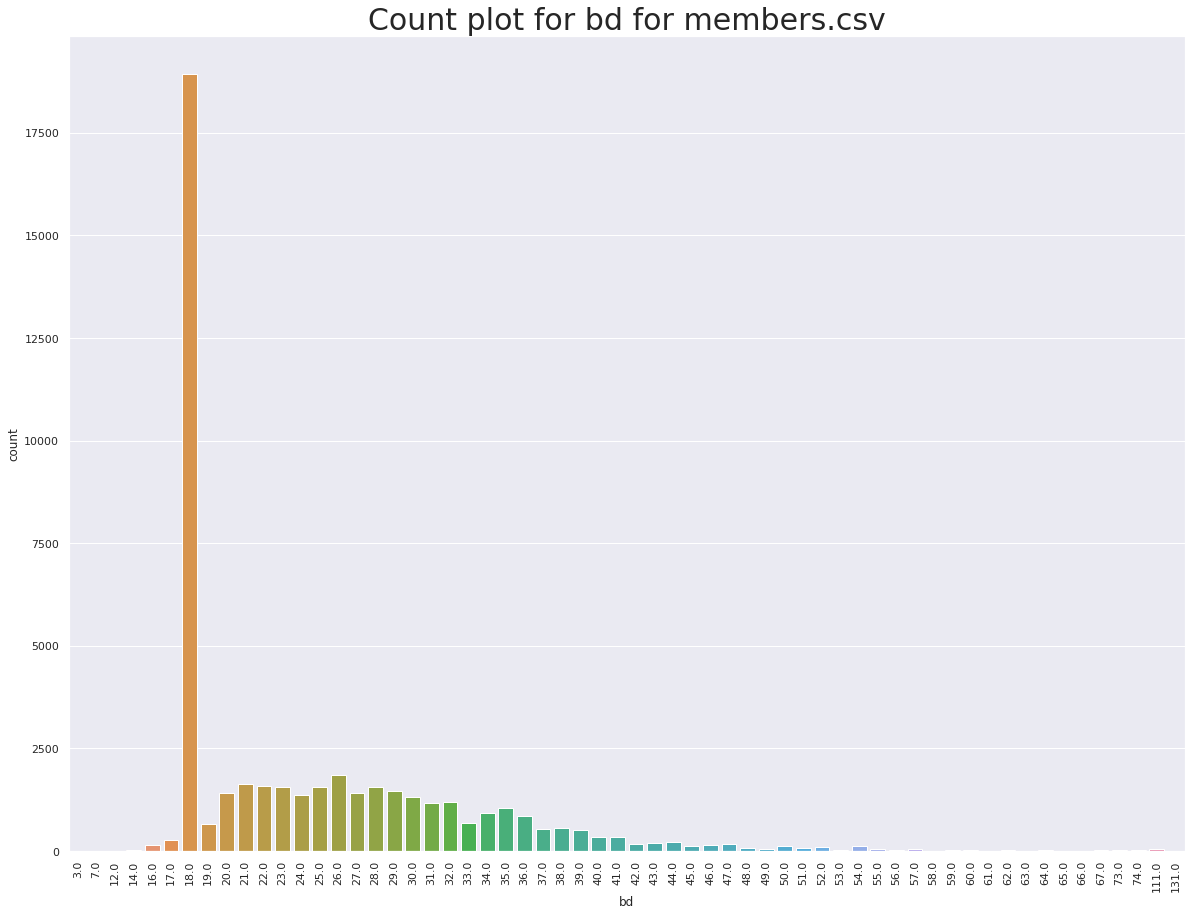

In [61]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='bd', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show() 

In [62]:
final_train["genre_ids"]=final_train["genre_ids"].astype(str)

In [63]:
import re 
lst=[]
for i in final_train["genre_ids"]:
  res = re.findall(r"[\w']+",i) #finding values with special charcter " | "
  lst.append(res[0])

In [64]:
final_train["genre_id"]=lst

In [65]:
final_train = final_train.drop(columns="genre_ids") #dropping existing genre_ids column
final_train = final_train.drop(columns="song_length")

In [66]:
final_train["genre_id"]=final_train["genre_id"].replace("nan", '0')

In [67]:
final_train["genre_id"]=pd.to_numeric(final_train["genre_id"])

In [68]:
import statistics

median_genre_id=int(statistics.median(final_train["genre_id"]))

In [69]:
print(median_genre_id)

0


In [70]:
final_train["genre_id"]=final_train["genre_id"].replace(0,median_genre_id )

In [71]:
final_train["genre_id"].head(50)

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10    465
11      0
12    465
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30    465
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
Name: genre_id, dtype: int64

In [72]:
final_train["language"].isna().sum()

44402

In [93]:
import statistics
median_lang=round(statistics.median(final_train["language"].isna()))
print(median_lang)

1


In [94]:
from numpy import nan
final_train["language"].fillna(median_lang, inplace=True)

In [95]:
final_train["language"].isna().sum()

0

In [96]:
final_train["name"].fillna("name_not_available", inplace=True)
final_train["isrc"].fillna("isrc_not_available", inplace=True)
final_train["artist_name"].fillna("artist_not_available", inplace=True)

final_train["source_system_tab"].fillna("data_not_available", inplace=True)
final_train["source_screen_name"].fillna("data_not_available", inplace=True)
final_train["source_type"].fillna("data_not_available", inplace=True)

In [97]:
print("Total percentage for NaN value in name column                    : ",(final_train["name"].isna().sum()/len(final_train["name"]))*100,"%")
print("Total percentage for NaN value in isrc column                    : ",(final_train["isrc"].isna().sum()/len(final_train["isrc"]))*100,"%")
print("Total percentage for NaN value in song_length column             : ",(round((final_train["song_duration_minutes"].isna().sum()/len(final_train["song_duration_minutes"]))*100)),"%")
print("Total percentage for NaN value in artist_name column             : ",(final_train["artist_name"].isna().sum()/len(final_train["artist_name"]))*100,"%")
print("Total percentage for NaN value in source_system_tab column       : ",(final_train["source_system_tab"].isna().sum()/len(final_train["source_system_tab"]))*100,"%")
print("Total percentage for NaN value in source_screen_name column      : ",(final_train["source_screen_name"].isna().sum()/len(final_train["source_screen_name"]))*100,"%")
print("Total percentage for NaN value in source_type column             : ",(final_train["source_type"].isna().sum()/len(final_train["source_type"]))*100,"%")

Total percentage for NaN value in name column                    :  0.0 %
Total percentage for NaN value in isrc column                    :  0.0 %
Total percentage for NaN value in song_length column             :  95 %
Total percentage for NaN value in artist_name column             :  0.0 %
Total percentage for NaN value in source_system_tab column       :  0.0 %
Total percentage for NaN value in source_screen_name column      :  0.0 %
Total percentage for NaN value in source_type column             :  0.0 %


In [98]:
final_train.head(2)

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,registration_init_time,expiration_date,name,isrc,artist_name,composer,lyricist,language,song_duration_minutes,genre_id
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1.0,18.0,gender_not_available,7.0,2012-01-02,2017-10-05,name_not_available,isrc_not_available,artist_not_available,NaN,NaN,1.0,NaN,0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,2011-05-25,2017-09-11,name_not_available,isrc_not_available,artist_not_available,NaN,NaN,1.0,NaN,0


In [99]:
final_train = final_train.drop(["composer","lyricist"],axis=1)

In [100]:
test_members = pd.merge(test, members, on='msno', how='left')
final_test   = pd.merge(test_members, song_info, on='song_id', how='left')

In [101]:
final_test.head()

,id,msno,song_id,source_system_tab,source_screen_name,source_type,city,bd,gender,registered_via,...,expiration_date,name,isrc,song_length,genre_ids,artist_name,composer,lyricist,language,song_duration_minutes
0,0,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,WmHKgKMlp1lQMecNdNvDMkvIycZYHnFwDT72I5sIssc=,my library,Local playlist more,local-library,1,0,NaN,7,...,2017-09-18,愛其實很殘忍,TWUM71400047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,V8ruy7SGk7tDm3zA51DPpn6qutt+vmKMBKa21dp54uM=,y/rsZ9DC7FwK5F2PK2D5mj+aOBUJAjuu3dZ14NgE0vM=,my library,Local playlist more,local-library,1,0,NaN,7,...,2017-09-18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,/uQAlrAkaczV+nWCd2sPF2ekvXPRipV7q0l+gbLuxjw=,8eZLFOdGVdXBSqoAv5nsLigeH2BvKXzTQYtUM53I0k4=,discover,NaN,song-based-playlist,1,0,NaN,4,...,2016-11-24,subarashiki nichijo,JPWP01070260,315899.0,2022,Yu Takahashi (高橋優),Yu Takahashi,Yu Takahashi,17.0,5.0
3,3,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,ztCf8thYsS4YN3GcIL/bvoxLm/T5mYBVKOO4C9NiVfQ=,radio,Radio,radio,3,30,male,9,...,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1a6oo/iXKatxQx4eS9zTVD+KlSVaAFbTIqVvwLC1Y0k=,MKVMpslKcQhMaFEgcEQhEfi5+RZhMYlU3eRDpySrH8Y=,radio,Radio,radio,3,30,male,9,...,2017-04-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [102]:
print(final_test.isnull().sum())

id                            0
msno                          0
song_id                       0
source_system_tab           150
source_screen_name         3049
source_type                 229
city                          0
bd                            0
gender                    22570
registered_via                0
registration_init_time        0
expiration_date               0
name                      44596
isrc                      45278
song_length               51638
genre_ids                 51638
artist_name               51638
composer                  52395
lyricist                  52839
language                  51638
song_duration_minutes     51638
dtype: int64


In [103]:
test['source_system_tab'].fillna('no_system_tab', inplace=True)
test['source_screen_name'].fillna('no_screen_name', inplace=True)
test['source_type'].fillna('no_source_type', inplace=True)

In [104]:
print(test.isnull().sum())

id                    0
msno                  0
song_id               0
source_system_tab     0
source_screen_name    0
source_type           0
dtype: int64


In [105]:
import pandas as pd
import numpy as np 
import datetime
members["expiration_date"]= pd.to_datetime(members["expiration_date"],format='%Y%m%d') 
members["registration_init_time"]= pd.to_datetime(members["registration_init_time"],format='%Y%m%d') 
members.dtypes

msno                              object
city                               int64
bd                                 int64
gender                            object
registered_via                     int64
registration_init_time    datetime64[ns]
expiration_date           datetime64[ns]
dtype: object

In [106]:
members['registration_init_time'].head(-50)

0       2011-08-20
1       2015-06-28
2       2016-04-11
3       2015-09-06
4       2017-01-26
           ...    
34348   2011-01-25
34349   2016-06-14
34350   2017-02-13
34351   2016-08-10
34352   2015-10-01
Name: registration_init_time, Length: 34353, dtype: datetime64[ns]

In [107]:
final_train['month'] = final_train['registration_init_time'].dt.month
final_train[['registration_init_time','month']].head()

,registration_init_time,month
0,2012-01-02,1.0
1,2011-05-25,5.0
2,2011-05-25,5.0
3,2011-05-25,5.0
4,2012-01-02,1.0


In [108]:
final_train['day'] =final_train['registration_init_time'].dt.day
final_train[['registration_init_time','day']].head()

,registration_init_time,day
0,2012-01-02,2.0
1,2011-05-25,25.0
2,2011-05-25,25.0
3,2011-05-25,25.0
4,2012-01-02,2.0


In [109]:
final_train['year'] =final_train['registration_init_time'].dt.year
final_train[['registration_init_time','year']].head()

,registration_init_time,year
0,2012-01-02,2012.0
1,2011-05-25,2011.0
2,2011-05-25,2011.0
3,2011-05-25,2011.0
4,2012-01-02,2012.0


In [110]:
final_train['year'] =final_train['registration_init_time'].dt.dayofweek
final_train[['registration_init_time','year']].head()

,registration_init_time,year
0,2012-01-02,0.0
1,2011-05-25,2.0
2,2011-05-25,2.0
3,2011-05-25,2.0
4,2012-01-02,0.0


In [111]:
final_train['ex_month'] = final_train['expiration_date'].dt.month
final_train[['expiration_date','ex_month']].head()

,expiration_date,ex_month
0,2017-10-05,10.0
1,2017-09-11,9.0
2,2017-09-11,9.0
3,2017-09-11,9.0
4,2017-10-05,10.0


In [112]:
final_train['ex_day'] = final_train['expiration_date'].dt.day
final_train[['expiration_date','ex_day']].head()

,expiration_date,ex_day
0,2017-10-05,5.0
1,2017-09-11,11.0
2,2017-09-11,11.0
3,2017-09-11,11.0
4,2017-10-05,5.0


In [113]:
final_train['ex_year'] = final_train['expiration_date'].dt.year
final_train[['expiration_date','ex_year']].head()

,expiration_date,ex_year
0,2017-10-05,2017.0
1,2017-09-11,2017.0
2,2017-09-11,2017.0
3,2017-09-11,2017.0
4,2017-10-05,2017.0


In [114]:
final_train['ex_dayofweek'] = final_train['expiration_date'].dt.dayofweek
final_train[['expiration_date','ex_dayofweek']].head()

,expiration_date,ex_dayofweek
0,2017-10-05,3.0
1,2017-09-11,0.0
2,2017-09-11,0.0
3,2017-09-11,0.0
4,2017-10-05,3.0


In [115]:
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,language,song_duration_minutes,genre_id,month,day,year,ex_month,ex_day,ex_year,ex_dayofweek
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1.0,18.0,gender_not_available,7.0,...,1.0,NaN,0,1.0,2.0,0.0,10.0,5.0,2017.0,3.0
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,1.0,NaN,0,5.0,25.0,2.0,9.0,11.0,2017.0,0.0
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,1.0,NaN,0,5.0,25.0,2.0,9.0,11.0,2017.0,0.0
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,1.0,NaN,0,5.0,25.0,2.0,9.0,11.0,2017.0,0.0
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,1.0,18.0,gender_not_available,7.0,...,1.0,NaN,0,1.0,2.0,0.0,10.0,5.0,2017.0,3.0


In [116]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["name"]) 
df = pd.DataFrame.from_records(d.most_common(), columns=['song_name','count'])
print(df.head(-10))

                   song_name  count
0         name_not_available  38899
1     好愛好散 (Blue Love Theme)    141
2                       迷途羔羊     84
3            Let Me Love You     78
4             大齡女子 (Darling)     72
...                      ...    ...
3003            Ride With Me      1
3004         Makes Me Wonder      1
3005                Lay back      1
3006                畢業後你不是我的      1
3007   Who’s Afraid of 138?!      1

[3008 rows x 2 columns]


In [117]:
final_train["artist_name"].head()

0    artist_not_available
1    artist_not_available
2    artist_not_available
3    artist_not_available
4    artist_not_available
Name: artist_name, dtype: object

In [118]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["artist_name"]) 
df1 = pd.DataFrame.from_records(d.most_common(), columns=['artist_name','count'])
print(df1.head(10))

                      artist_name  count
0            artist_not_available  44402
1                             玖壹壹     92
2  兄弟本色G.U.T.S. (姚中仁、張震嶽、頑童MJ116)     84
3                   孫盛希 (Shi Shi)     77
4                    林俊傑 (JJ Lin)     65
5                       BLACKPINK     60
6                   謝和弦 (R-chord)     57
7                 Various Artists     51
8                     楊凱琳 (Rosie)     49
9               楊乃文 (Naiwen Yang)     48


In [119]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["song_duration_minutes"]) 
df2 = pd.DataFrame.from_records(d.most_common(), columns=['song_duration_minutes','count'])
print(df2.head(10))

   song_duration_minutes  count
0                    4.0   1140
1                    5.0    687
2                    3.0    486
3                    6.0     77
4                    2.0     15
5                    1.0      7
6                    8.0      6
7                    7.0      5
8                    NaN      1
9                    NaN      1


In [121]:
import statistics

median_song=round(statistics.median(final_train["song_duration_minutes"].isna())) #finding median value 
median_song

1

In [122]:
from numpy import nan
final_train["song_duration_minutes"]=final_train["song_duration_minutes"].mask(final_train["song_duration_minutes"]==0.0).fillna(median_song)

In [123]:
final_train["song_duration_minutes"]=final_train["song_duration_minutes"].astype(int)

In [124]:
from collections import Counter 
import pandas as pd  
d = Counter(final_train["song_duration_minutes"]) 
df3 = pd.DataFrame.from_records(d.most_common(), columns=['song_duration_minutes','count'])
print(df3.head(10))

   song_duration_minutes  count
0                      1  44409
1                      4   1140
2                      5    687
3                      3    486
4                      6     77
5                      2     15
6                      8      6
7                      7      5
8                     13      1
9                     10      1


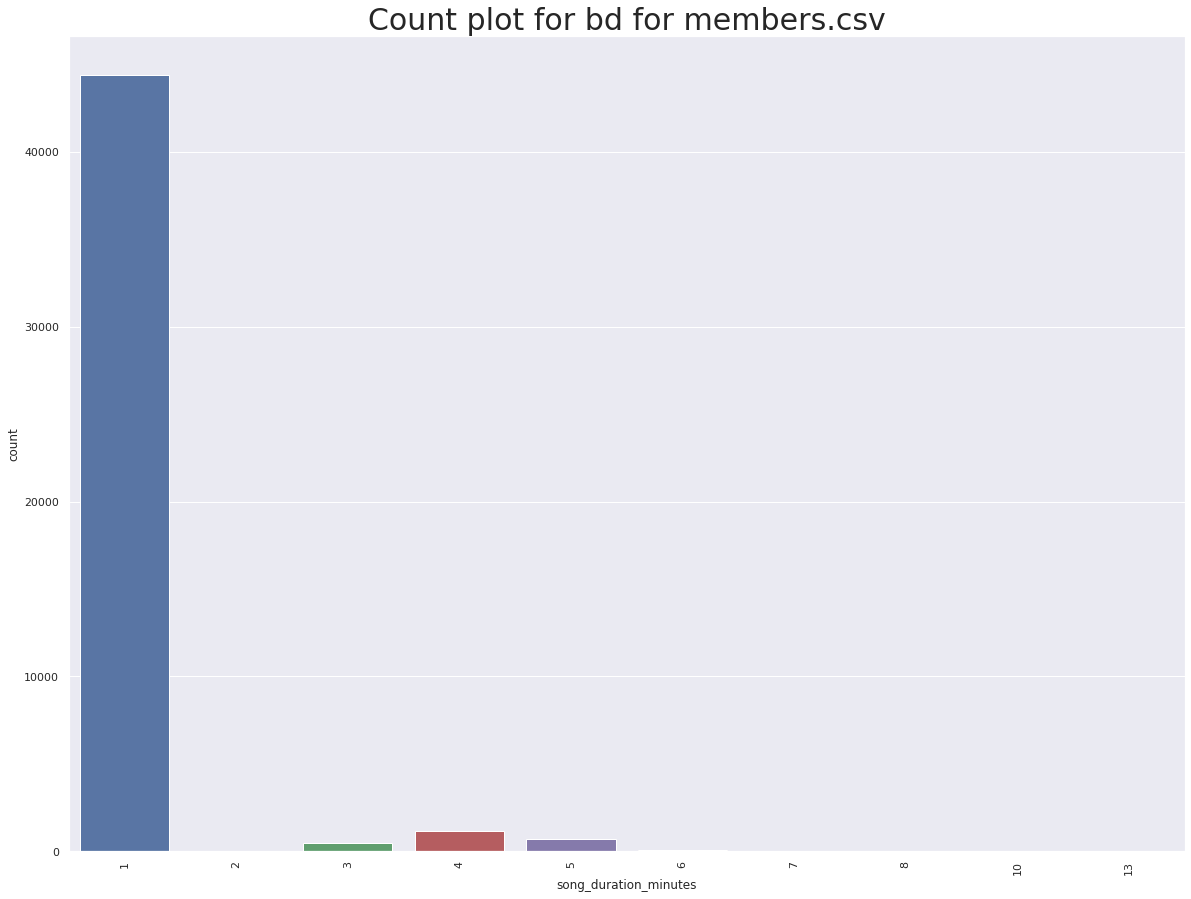

In [125]:
plt.figure(figsize=(20,15))
# count plot on single categorical variable 
sns.countplot(x ='song_duration_minutes', data = final_train) 
plt.xticks(rotation='90')
plt.title('Count plot for bd for members.csv',fontsize=30)
  
# Show the plot 
plt.show()

In [126]:
isrc                             = final_train['isrc']
final_train['country_code']      = isrc.str.slice(0, 2)
final_train['registration_code'] = isrc.str.slice(2, 5)
final_train['song_year']         = isrc.str.slice(5, 7)

In [127]:
final_train['song_year'] = final_train['song_year'] .replace("no", 0)
final_train['song_year']=final_train['song_year'].astype(int)
import statistics
median_value = int(statistics.median(final_train["song_year"])) #finding median value 
final_train['song_year'] = final_train['song_year'].apply(lambda x: 2000+x if x < 18 else 1900+x)

In [139]:
member_song_count = final_train.groupby('msno').count()['song_id'].to_dict()
final_train['member_song_count'] = final_train['msno'].apply(lambda x: member_song_count[x])

#artist count for each song
artist_song_count = final_train.groupby('artist_name').count()['song_id'].to_dict()
final_train['artist_song_count'] = final_train['artist_name'].apply(lambda x: artist_song_count[x])

#genre count for each song
first_genre_id_song_count = final_train.groupby('genre_id').count()['song_id'].to_dict()
final_train['genre_id'] = final_train['genre_id'].apply(lambda x: first_genre_id_song_count[x])

#language count for each song
lang_song_count = final_train.groupby('language').count()['song_id'].to_dict()
final_train['lang_song_count'] = final_train['language'].apply(lambda x: lang_song_count[x])

#user count for each song
song_member_count = final_train.groupby('song_id').count()['msno'].to_dict()
final_train['song_member_count'] = final_train['song_id'].apply(song_member_count.get)
#agecount for each song
age_song_count = final_train.groupby('bd').count()['song_id'].to_dict()
final_train['age_song_count'] = final_train['bd'].apply(lambda x: age_song_count[x])
final_train = final_train.drop(columns="isrc")
final_train.head()

,msno,song_id,source_system_tab,source_screen_name,source_type,target,city,bd,gender,registered_via,...,ex_year,ex_dayofweek,country_code,registration_code,song_year,member_song_count,artist_song_count,lang_song_count,song_member_count,age_song_count
0,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,BBzumQNXUHKdEBOB7mAJuzok+IJA1c2Ryg/yzTF6tik=,explore,Explore,online-playlist,1.0,1.0,18.0,gender_not_available,7.0,...,2017.0,3.0,is,rc_,2000,49,44401,44401,3.0,18924
1,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,bhp/MpSNoqoxOIB+/l8WPqu6jldth4DIpCm3ayXnJqM=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,2017.0,0.0,is,rc_,2000,6,44401,44401,1.0,1362
2,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,JNWfrrC7zNN7BdMpsISKa4Mw+xVJYNnxXh3/Epw7QgY=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,2017.0,0.0,is,rc_,2000,6,44401,44401,1.0,1362
3,Xumu+NIjS6QYVxDS4/t3SawvJ7viT9hPKXmf0RtLNx8=,2A87tzfnJTSWqD7gIZHisolhe4DMdzkbd6LzO1KHjNs=,my library,Local playlist more,local-playlist,1.0,13.0,24.0,female,9.0,...,2017.0,0.0,is,rc_,2000,6,44401,44401,1.0,1362
4,FGtllVqz18RPiwJj/edr2gV78zirAiY/9SmYvia+kCg=,3qm6XTZ6MOCU11x8FIVbAGH5l5uMkT3/ZalWG1oo2Gc=,explore,Explore,online-playlist,1.0,1.0,18.0,gender_not_available,7.0,...,2017.0,3.0,QM,3E2,2016,49,44401,44401,2.0,18924


In [140]:
final_train.to_csv('./copy_final_train.csv', index=False)